# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.shape

(50000, 14)

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [10]:
# check for null/missing values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [11]:
# Let's check the balance of data
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

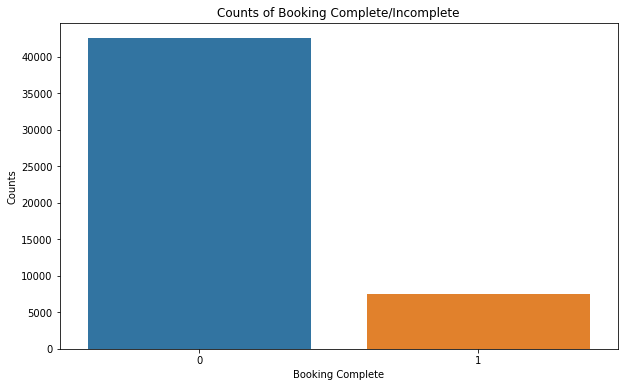

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='booking_complete', data=df)
plt.xlabel('Booking Complete')
plt.ylabel('Counts')
plt.title('Counts of Booking Complete/Incomplete')
plt.show()

From above countplot we can see that our data is highly imbalanced.

Let's check other feature columns to see various insights.

num_passengers 

In [13]:
df['num_passengers'].value_counts()

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64

In [14]:
df.groupby(['num_passengers','booking_complete'])['booking_complete'].count()

num_passengers  booking_complete
1               0                   26897
                1                    4455
2               0                   10753
                1                    2051
3               0                    2450
                1                     491
4               0                    1509
                1                     275
5               0                     452
                1                     109
6               0                     235
                1                      54
7               0                      96
                1                      18
8               0                      77
                1                      12
9               0                      53
                1                      13
Name: booking_complete, dtype: int64

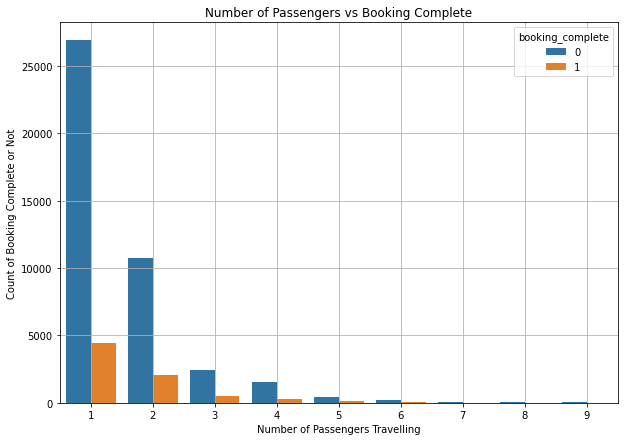

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(x='num_passengers', data=df, hue='booking_complete')
plt.xlabel('Number of Passengers Travelling')
plt.ylabel('Count of Booking Complete or Not')
plt.title('Number of Passengers vs Booking Complete')
plt.grid(True)
plt.show()

sales_channel

In [16]:
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [17]:
df.groupby(['sales_channel','booking_complete'])['booking_complete'].count()

sales_channel  booking_complete
Internet       0                   37513
               1                    6869
Mobile         0                    5009
               1                     609
Name: booking_complete, dtype: int64

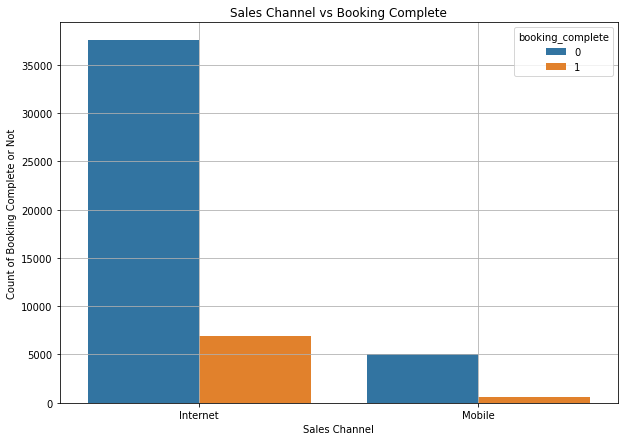

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(x='sales_channel', data=df, hue='booking_complete')
plt.xlabel('Sales Channel')
plt.ylabel('Count of Booking Complete or Not')
plt.title('Sales Channel vs Booking Complete')
plt.grid(True)
plt.show()

trip_type

In [19]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [20]:
df.groupby(['trip_type','booking_complete'])['booking_complete'].count()

trip_type   booking_complete
CircleTrip  0                     111
            1                       5
OneWay      0                     367
            1                      20
RoundTrip   0                   42044
            1                    7453
Name: booking_complete, dtype: int64

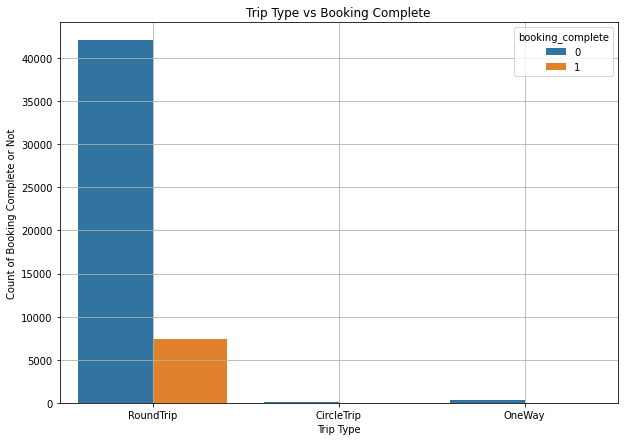

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(x='trip_type', data=df, hue='booking_complete')
plt.xlabel('Trip Type')
plt.ylabel('Count of Booking Complete or Not')
plt.title('Trip Type vs Booking Complete')
plt.grid(True)
plt.show()

flight_hour

In [22]:
df['flight_hour'].value_counts()

8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: flight_hour, dtype: int64

In [23]:
df.groupby(['flight_hour','booking_complete'])['booking_complete'].count()

flight_hour  booking_complete
0            0                   1357
             1                    182
1            0                   1804
             1                    285
2            0                   2253
             1                    389
3            0                   2262
             1                    393
4            0                   2413
             1                    430
5            0                   2420
             1                    431
6            0                   2562
             1                    488
7            0                   2703
             1                    423
8            0                   2681
             1                    484
9            0                   2624
             1                    508
10           0                   2670
             1                    415
11           0                   2703
             1                    407
12           0                   2703
             1      

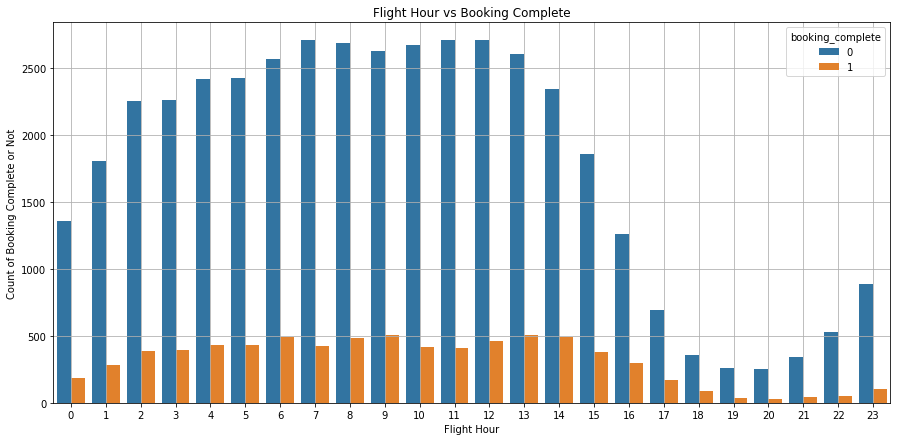

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(x='flight_hour', data=df, hue='booking_complete')
plt.xlabel('Flight Hour')
plt.ylabel('Count of Booking Complete or Not')
plt.title('Flight Hour vs Booking Complete')
plt.grid(True)
plt.show()

flight_day

In [25]:
df['flight_day'].value_counts()

1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: flight_day, dtype: int64

In [26]:
df.groupby(['flight_day','booking_complete'])['booking_complete'].count()

flight_day  booking_complete
1           0                   6898
            1                   1204
2           0                   6544
            1                   1129
3           0                   6422
            1                   1252
4           0                   6302
            1                   1122
5           0                   5778
            1                    983
6           0                   4951
            1                    861
7           0                   5627
            1                    927
Name: booking_complete, dtype: int64

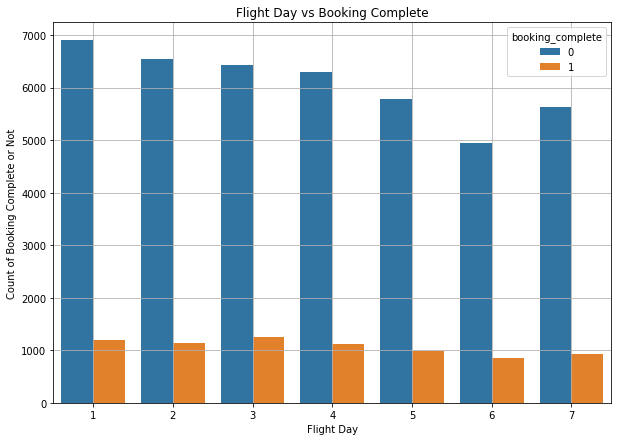

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(x='flight_day', data=df, hue='booking_complete')
plt.xlabel('Flight Day')
plt.ylabel('Count of Booking Complete or Not')
plt.title('Flight Day vs Booking Complete')
plt.grid(True)
plt.show()

wanta_extra_baggage

In [30]:
df['wants_extra_baggage'].value_counts()

1    33439
0    16561
Name: wants_extra_baggage, dtype: int64

In [31]:
df.groupby(['wants_extra_baggage','booking_complete'])['booking_complete'].count()

wants_extra_baggage  booking_complete
0                    0                   14656
                     1                    1905
1                    0                   27866
                     1                    5573
Name: booking_complete, dtype: int64

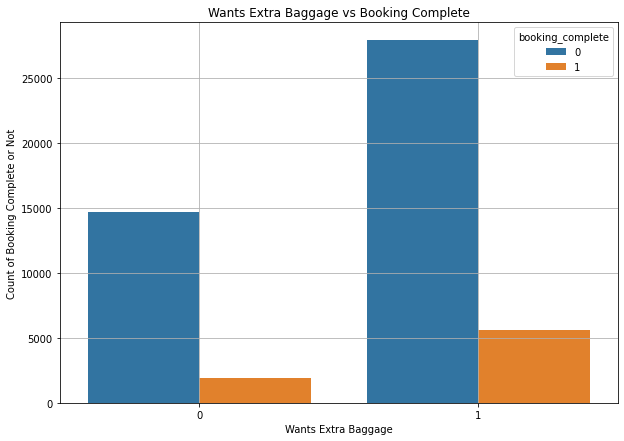

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(x='wants_extra_baggage', data=df, hue='booking_complete')
plt.xlabel('Wants Extra Baggage')
plt.ylabel('Count of Booking Complete or Not')
plt.title('Wants Extra Baggage vs Booking Complete')
plt.grid(True)
plt.show()

wants_preferred_seat

In [34]:
df['wants_preferred_seat'].value_counts()

0    35152
1    14848
Name: wants_preferred_seat, dtype: int64

In [35]:
df.groupby(['wants_preferred_seat','booking_complete'])['booking_complete'].count()

wants_preferred_seat  booking_complete
0                     0                   30303
                      1                    4849
1                     0                   12219
                      1                    2629
Name: booking_complete, dtype: int64

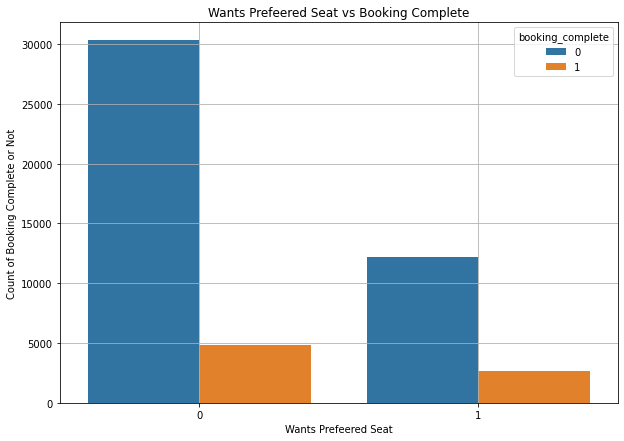

In [36]:
plt.figure(figsize=(10,7))
sns.countplot(x='wants_preferred_seat', data=df, hue='booking_complete')
plt.xlabel('Wants Prefeered Seat')
plt.ylabel('Count of Booking Complete or Not')
plt.title('Wants Prefeered Seat vs Booking Complete')
plt.grid(True)
plt.show()

wants_in_flight_meals

In [38]:
df['wants_in_flight_meals'].value_counts()

0    28643
1    21357
Name: wants_in_flight_meals, dtype: int64

In [39]:
df.groupby(['wants_in_flight_meals','booking_complete'])['booking_complete'].count()

wants_in_flight_meals  booking_complete
0                      0                   24593
                       1                    4050
1                      0                   17929
                       1                    3428
Name: booking_complete, dtype: int64

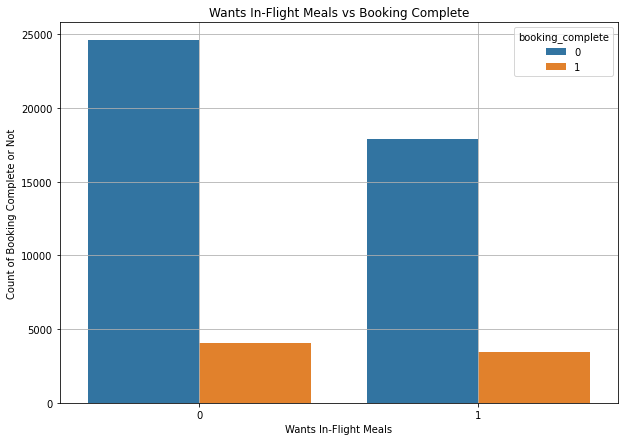

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(x='wants_in_flight_meals', data=df, hue='booking_complete')
plt.xlabel('Wants In-Flight Meals')
plt.ylabel('Count of Booking Complete or Not')
plt.title('Wants In-Flight Meals vs Booking Complete')
plt.grid(True)
plt.show()

flight_duration

In [42]:
df['flight_duration'].value_counts()

8.83    14520
8.58     6965
5.62     5524
6.62     4721
7.00     3374
7.57     2835
4.67     2743
6.42     1737
5.33     1554
4.75     1255
6.33     1190
8.67      807
5.52      667
5.07      512
4.72      502
8.15      311
5.00      241
7.42      224
4.83      156
5.13      125
9.50       37
Name: flight_duration, dtype: int64

In [43]:
df.groupby(['flight_duration','booking_complete'])['booking_complete'].count()

flight_duration  booking_complete
4.67             0                    2068
                 1                     675
4.72             0                     381
                 1                     121
4.75             0                     836
                 1                     419
4.83             0                     137
                 1                      19
5.00             0                     183
                 1                      58
5.07             0                     391
                 1                     121
5.13             0                      97
                 1                      28
5.33             0                    1168
                 1                     386
5.52             0                     615
                 1                      52
5.62             0                    4999
                 1                     525
6.33             0                     995
                 1                     195
6.42             0  

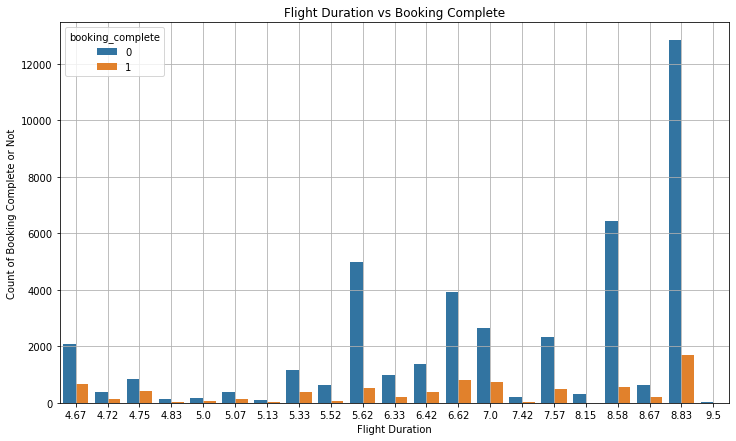

In [45]:
plt.figure(figsize=(12,7))
sns.countplot(x='flight_duration', data=df, hue='booking_complete')
plt.xlabel('Flight Duration')
plt.ylabel('Count of Booking Complete or Not')
plt.title('Flight Duration vs Booking Complete')
plt.grid(True)
plt.show()

In [47]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

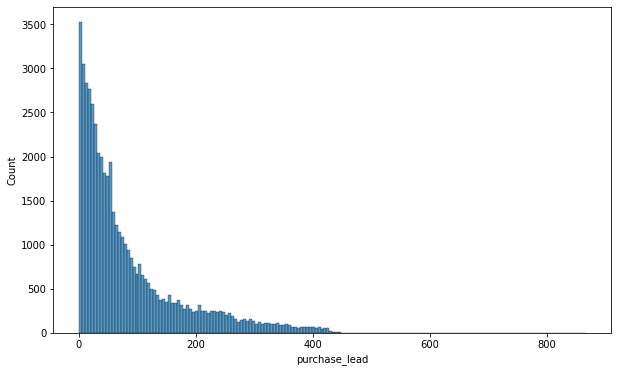

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(x='purchase_lead', data=df)
plt.show()

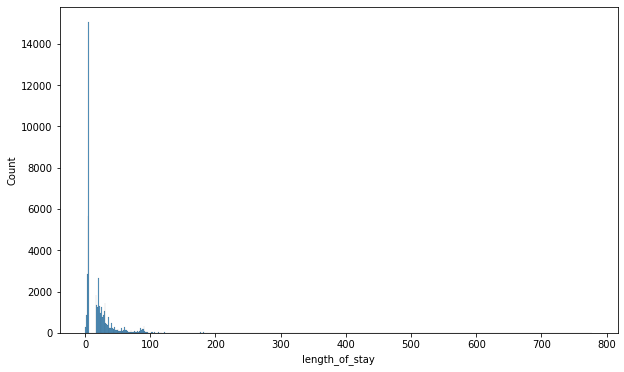

In [51]:
plt.figure(figsize=(10,6))
sns.histplot(x='length_of_stay', data=df)
plt.show()

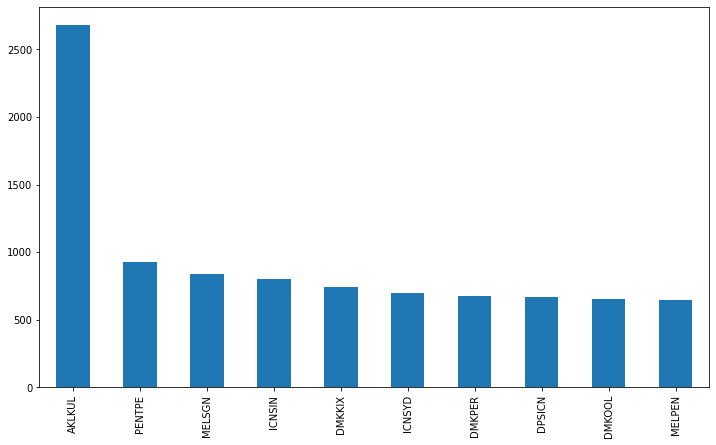

In [62]:
plt.figure(figsize=(12,7))
df['route'].value_counts().head(10).plot(kind='bar')
plt.show()

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [67]:
df['sales_channel'] = le.fit_transform(df['sales_channel'])
df['trip_type'] = le.fit_transform(df['trip_type'])
df['route'] = le.fit_transform(df['route'])
df['booking_origin'] = le.fit_transform(df['booking_origin'])

In [72]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0


In [69]:
X = df.drop(['booking_complete'],axis=1)
y = df['booking_complete']

In [70]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [74]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [75]:
X_train_scaled = ss.fit_transform(X_train)

In [76]:
X_test_scaled = ss.transform(X_test)

In [77]:
print('Before SMOTE, Count of class 1 : {}'.format(sum(y_train==1)))
print('Before SMOTE, Count of class 0 : {}'.format(sum(y_train==0)))

# import SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train.ravel())

print('After Oversampling the shape of X_train_sm : {}'.format(X_train_sm.shape))
print('After Oversampling the shape of y_train_sm : {}'.format(y_train_sm.shape))

print('After SMOTE, Count of class 1 : {}'.format(sum(y_train_sm==1)))
print('After SMOTE, Count of class 0 : {}'.format(sum(y_train_sm==0)))

Before SMOTE, Count of class 1 : 5262
Before SMOTE, Count of class 0 : 29738
After Oversampling the shape of X_train_sm : (59476, 13)
After Oversampling the shape of y_train_sm : (59476,)
After SMOTE, Count of class 1 : 29738
After SMOTE, Count of class 0 : 29738


### Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [80]:
logreg.fit(X_train_sm,y_train_sm)

LogisticRegression()

In [81]:
logreg.score(X_train_sm,y_train_sm)

0.6329275674221535

In [82]:
logreg_predict = logreg.predict(X_test_scaled)

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [88]:
# Confusion Matrix
print('Confusion Matrix:\n', confusion_matrix(y_test,logreg_predict))

# Accuracy Score
print('Accuracy Score:', accuracy_score(y_test,logreg_predict)*100)

# Classification Report
print('Classification Report:\n', classification_report(y_test,logreg_predict))

Confusion Matrix:
 [[7716 5068]
 [ 787 1429]]
Accuracy Score: 60.96666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.60      0.72     12784
           1       0.22      0.64      0.33      2216

    accuracy                           0.61     15000
   macro avg       0.56      0.62      0.53     15000
weighted avg       0.81      0.61      0.67     15000



#### Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [90]:
dt.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier()

In [91]:
dt.score(X_train_sm, y_train_sm)

0.9999495594861793

In [92]:
dt_predict = dt.predict(X_test_scaled)

In [93]:
# Confusion Matrix
print('Confusion Matrix:\n', confusion_matrix(y_test,dt_predict))

# Accuracy Score
print('Accuracy Score:', accuracy_score(y_test,dt_predict)*100)

# Classification Report
print('Classification Report:\n', classification_report(y_test,dt_predict))

Confusion Matrix:
 [[10778  2006]
 [ 1462   754]]
Accuracy Score: 76.88000000000001
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86     12784
           1       0.27      0.34      0.30      2216

    accuracy                           0.77     15000
   macro avg       0.58      0.59      0.58     15000
weighted avg       0.79      0.77      0.78     15000



#### Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [95]:
rfc.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [96]:
rfc.score(X_train_sm, y_train_sm)

0.9999495594861793

In [97]:
rfc_predict = rfc.predict(X_test_scaled)

In [98]:
# Confusion Matrix
print('Confusion Matrix:\n', confusion_matrix(y_test,rfc_predict))

# Accuracy Score
print('Accuracy Score:', accuracy_score(y_test,rfc_predict)*100)

# Classification Report
print('Classification Report:\n', classification_report(y_test,rfc_predict))

Confusion Matrix:
 [[12118   666]
 [ 1737   479]]
Accuracy Score: 83.98
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     12784
           1       0.42      0.22      0.29      2216

    accuracy                           0.84     15000
   macro avg       0.65      0.58      0.60     15000
weighted avg       0.81      0.84      0.82     15000



#### XGBoost

In [106]:
from xgboost import XGBClassifier, plot_importance
xgbc = XGBClassifier()

In [107]:
xgbc.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [108]:
xgbc.score(X_train_sm, y_train_sm)

0.9256338691236802

In [109]:
xgbc_predict = xgbc.predict(X_test_scaled)

In [110]:
# Confusion Matrix
print('Confusion Matrix:\n', confusion_matrix(y_test,xgbc_predict))

# Accuracy Score
print('Accuracy Score:', accuracy_score(y_test,xgbc_predict)*100)

# Classification Report
print('Classification Report:\n', classification_report(y_test,xgbc_predict))

Confusion Matrix:
 [[12463   321]
 [ 1933   283]]
Accuracy Score: 84.97333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92     12784
           1       0.47      0.13      0.20      2216

    accuracy                           0.85     15000
   macro avg       0.67      0.55      0.56     15000
weighted avg       0.81      0.85      0.81     15000



In [111]:
print(xgbc.feature_importances_)

[0.0736464  0.07542247 0.02464423 0.01490124 0.11852387 0.07732806
 0.19164926 0.0248624  0.22525416 0.0439873  0.02622291 0.02982363
 0.07373414]


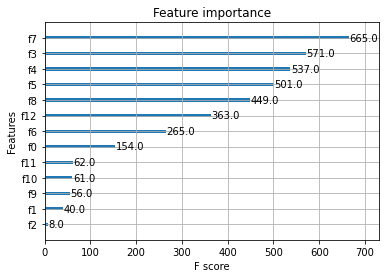

In [113]:
# plot feature importance
plot_importance(xgbc)
plt.show()

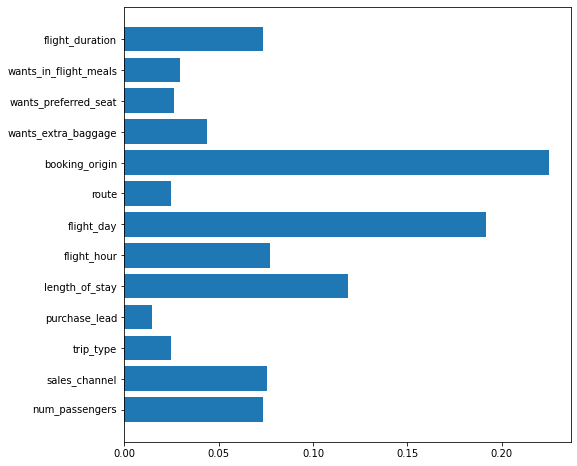

In [125]:
# plot
plt.figure(figsize=(8,8))
plt.barh(range(len(xgbc.feature_importances_)), xgbc.feature_importances_)
plt.yticks(ticks=range(0,13),labels = ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration'])
plt.show()

In [118]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')